---
# Problem Statement
---

VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurances at best prices with 24/7 claim settlement.  It offers different types of policies for  both personal and commercial vehicles. It has established its brand across different regions in India. 

Around 90% of the businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at doorstep, etc. Inorder to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).

 Inorder to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, as a part of this challenge, your task at hand is to build a high performance and interpretable machine learning model to predict the CLTV based on the user and policy data.

#### Predict CLTV of a customer

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the train dataset
train=pd.read_csv("JOB-A-THON/train_BRCpofr.csv")

In [3]:
#Checking the shape of data
train.shape

(89392, 12)

In [4]:
#Checking the top 5 data
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [5]:
#Checking the null values
train.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

There is no any null values.

In [6]:
#Checking the datatype
train.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [7]:
#Changing the category of variable
train["id"]=train["id"].astype("category")

In [8]:
#Checking the values of gender
train["gender"].value_counts()

Male      50497
Female    38895
Name: gender, dtype: int64

In [9]:
#Checking the values present in area column
train["area"].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [10]:
#Checking the values present in qualification
train["qualification"].value_counts()

High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

In [11]:
#Checking the values of type_of_policy
train["type_of_policy"].value_counts()

Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

In [12]:
#Checking the duplicate values
train.duplicated().sum()

0

In [13]:
train.describe()

,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,0.575488,4.595669,4351.502416,97952.828978
std,0.494272,2.290446,3262.359775,90613.814793
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2406.000000,52836.000000
50%,1.000000,5.000000,4089.000000,66396.000000
75%,1.000000,6.000000,6094.000000,103440.000000
max,1.000000,8.000000,31894.000000,724068.000000


### EDA

### Univariate Analysis

Checking the Target Variable

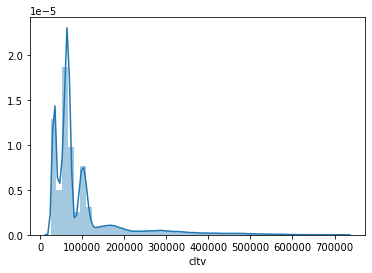

In [14]:
#Visualising the data
sns.distplot(train["cltv"])
plt.show()

**Data is right skewed many customers have high customer life time value and many customers have low cltv.**

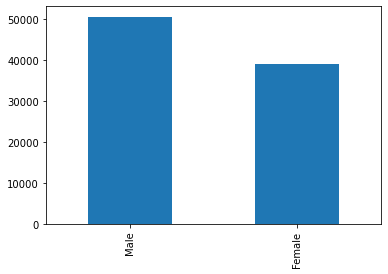

In [15]:
train["gender"].value_counts().plot(kind="bar")
plt.show()

**Vahanbima has more male no of customers while felmales are less in numbers.**

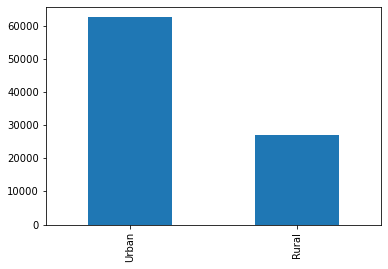

In [16]:
train["area"].value_counts().plot(kind="bar")
plt.show()

**Most of the customers are from urban area while rural has less no of customers.**

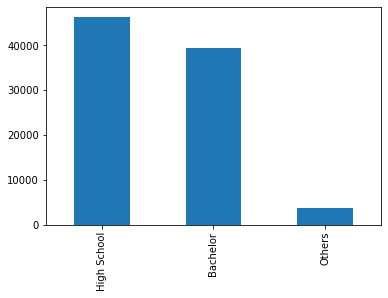

In [17]:
train["qualification"].value_counts().plot(kind="bar")
plt.show()

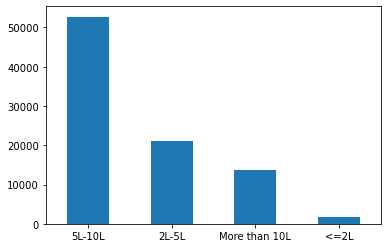

In [18]:
train["income"].value_counts().plot(kind="bar")
plt.xticks(rotation="horizontal")
plt.show()

**Those customers whose income is in the range of 5L-10L are taking more insurance than any others.**

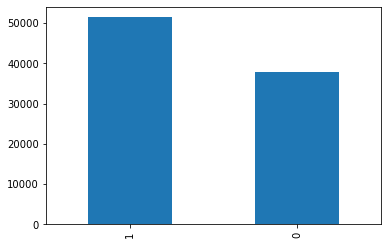

In [19]:
train["marital_status"].value_counts().plot(kind="bar")
plt.show()

**Married customers are taking more interest in insurance than single person.**

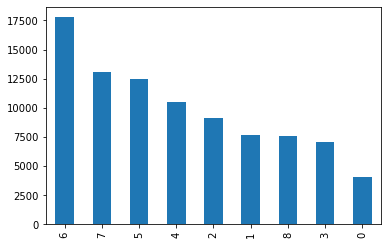

In [20]:
train["vintage"].value_counts().plot(kind="bar")
plt.show()

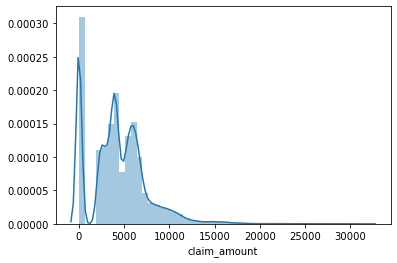

In [21]:
sns.distplot(train["claim_amount"])
plt.show()

Claim amount data is also right skewed many customers have high claim amount and many have low claim amount.

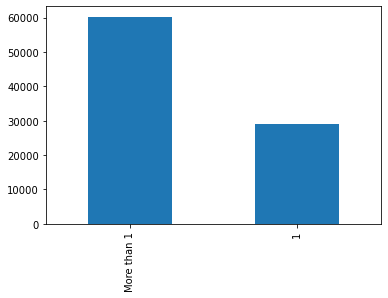

In [22]:
train["num_policies"].value_counts().plot(kind="bar")
plt.show()

**Most of the customers having more than one insurance while less no of customers having only one insurance.**

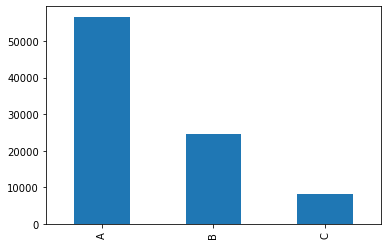

In [23]:
train["policy"].value_counts().plot(kind="bar")
plt.show()

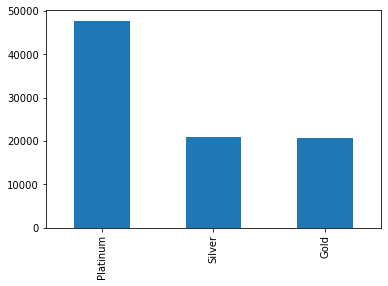

In [24]:
train["type_of_policy"].value_counts().plot(kind="bar")
plt.show()

**Platinum policy is high in number in comparison to silver and gold policy.**

### Bivariate Analysis

Now, moving towards the bivariate analysis we will plot the graphs between the diffrenet different variables with the target variable

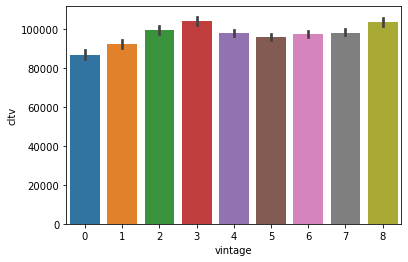

In [25]:
#Plotting graph between vintage and cltv
sns.barplot(x=train["vintage"],y=train["cltv"])
plt.show()

Those customers who have 3 years of vintage having high cltv.

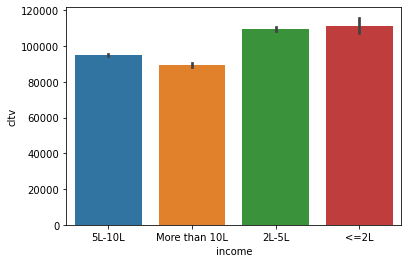

In [26]:
sns.barplot(x=train["income"],y=train["cltv"])
plt.show()

Those customers having income is in between 2L-5L and <=2L are having almost similar cltv while others have lesser than these two.

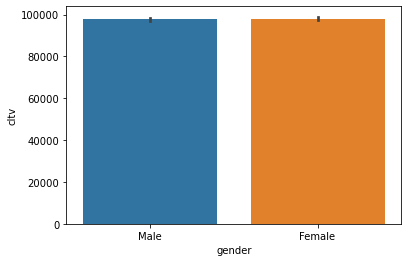

In [27]:
sns.barplot(x=train["gender"],y=train["cltv"])
plt.show()

Female and Male both have exact same cltv.

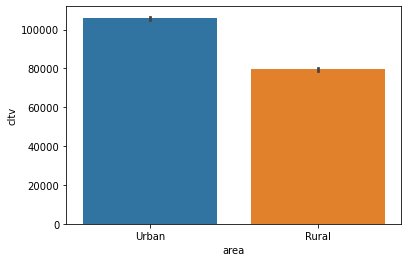

In [28]:
sns.barplot(x=train["area"],y=train["cltv"])
plt.show()

Those customers who are belonging to urban area having high cltv than rural customers.

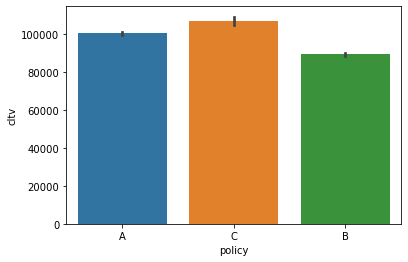

In [29]:
sns.barplot(x=train["policy"],y=train["cltv"])
plt.show()

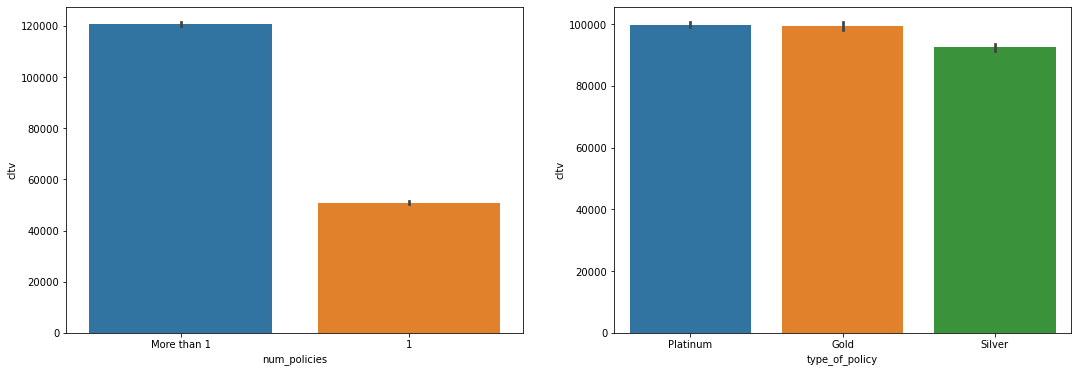

In [30]:
plt.figure(figsize=(18,6))


plt.subplot(1,2,1)
sns.barplot(x=train["num_policies"],y=train["cltv"])

plt.subplot(1,2,2)
sns.barplot(x=train["type_of_policy"],y=train["cltv"])
plt.show()

1. Those customers having more than 1 insurance belongs to high cltv in comparison to those who have 1 insurance.
2. Platinum type of policy have high cltv.

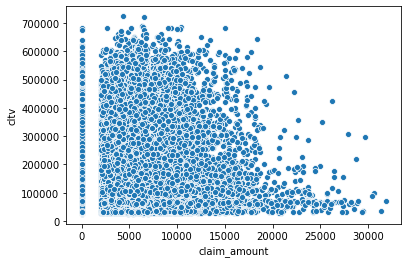

In [31]:
sns.scatterplot(x=train["claim_amount"],y=train["cltv"])
plt.show()

As the claim amount is increasing cltv is decreasing.

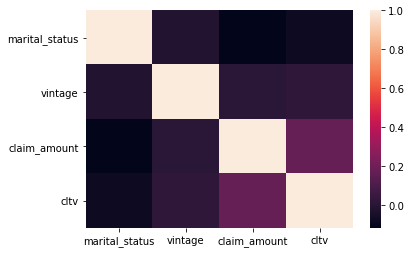

In [32]:
sns.heatmap(train.corr())

As we know that heatmap depend only upon numerical data and from this heatmap we can't infer any insight.

### Multivariate Analysis

For Multivariate analysis we will create the pivot table and scatterplots.

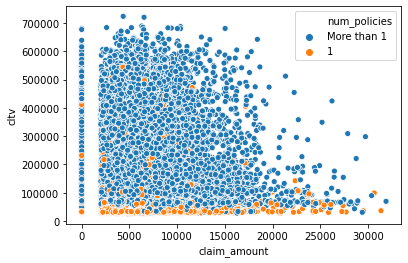

In [33]:
#scatter plot of cltv,claim amount and num of policies
sns.scatterplot(x=train["claim_amount"],y=train["cltv"],hue=train["num_policies"])
plt.show()

Those customers who is having more than 1 insurance and low claim amount having high cltv.

#### Outlier Removal

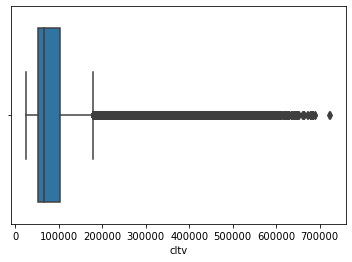

In [34]:
sns.boxplot(train["cltv"])

In [35]:
#Removing outlierst
train = train[(train["cltv"]>0)& (train["cltv"]<100000)]

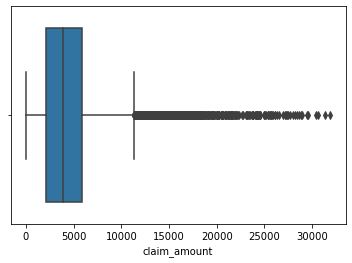

In [36]:
#Box plot of claim amount
sns.boxplot(train["claim_amount"])

In [37]:
train=train[(train["claim_amount"]>0)&(train["claim_amount"]<9000)]

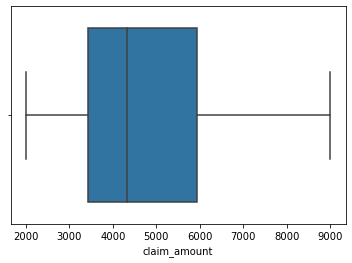

In [38]:
sns.boxplot(train["claim_amount"])

In [39]:
train["claim_amount"]=np.log(train["claim_amount"].values+1)

### Feature Engineering

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
#Let's intantiate the label encoder
le=LabelEncoder()

In [42]:
#label encoding of some specific columns
list_of_cat_columns=["gender","area","qualification","type_of_policy","policy","num_policies"]
for i in list_of_cat_columns:
    train[i]=le.fit_transform(train[i])

In [43]:
#Checking the all values present in income column
train["income"].value_counts()

5L-10L           27490
2L-5L            11392
More than 10L     6364
<=2L              1098
Name: income, dtype: int64

In [44]:
#Customize encoding of income column like more than 10l to 1,5l-10l to 2,2l-5l to 3 and <=2l to 0
train["income"]=train["income"].map({"More than 10L":1,"5L-10L":2,
                                    "2L-5L":3,"<=2L":0})

In [45]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,2,1,5,8.664060,1,0,1,64308
2,3,1,1,0,2,1,8,7.863267,1,0,1,64212
4,5,1,1,1,1,1,6,8.163086,1,0,0,59736
7,8,0,1,1,2,0,0,8.607765,1,0,2,64128
8,9,0,1,1,2,1,3,8.717027,1,0,0,94536


## Machine Learning

In [46]:
#Segregating the independent and dependent variable
x=train.drop(["cltv"],axis=1)
y=np.log(train["cltv"])

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(x)

In [48]:
#convertig train scaled into dataframe
x = pd.DataFrame(train_scaled, columns = x.columns)
x.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,0.000000,1.0,1.0,0.0,0.666667,1.0,0.625,0.706805,1.0,0.0,0.5
1,0.000022,1.0,1.0,0.0,0.666667,1.0,1.000,0.174174,1.0,0.0,0.5
2,0.000045,1.0,1.0,0.5,0.333333,1.0,0.750,0.373593,1.0,0.0,0.0
3,0.000078,0.0,1.0,0.5,0.666667,0.0,0.000,0.669362,1.0,0.0,1.0
4,0.000089,0.0,1.0,0.5,0.666667,1.0,0.375,0.742035,1.0,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split
x_train,val_x,y_train,val_y=train_test_split(x,y,random_state=10)

In [50]:
x_train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
32319,0.697051,0.0,0.0,0.5,0.666667,1.0,0.375,0.140326,1.0,0.0,0.0
41098,0.887502,0.0,1.0,0.5,0.666667,1.0,1.000,0.352800,1.0,0.0,0.5
45750,0.987347,0.0,1.0,0.5,1.000000,0.0,0.750,0.771649,1.0,0.0,1.0
40474,0.873730,1.0,1.0,0.0,1.000000,1.0,1.000,0.505857,1.0,0.0,0.5
22013,0.476149,0.0,0.0,0.5,0.666667,1.0,0.875,0.050240,0.0,0.5,0.5


In [51]:
#Import metrics for checking the accuracy of algorithm
from sklearn.metrics import r2_score

#### Linear Regression

In [52]:
#Import linear regression from scikit learn
from sklearn.linear_model import LinearRegression

In [53]:
#Instantiate thelinear regression
lr=LinearRegression(normalize=True)

In [54]:
#Fit the data on model and find out the accuracy
lr.fit(x_train,y_train)
val_pred_lr=lr.predict(val_x)
lr_score=r2_score(val_pred_lr,val_y)

#### Random Forest

In [55]:
#Importing random forest model 
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor=RandomForestRegressor(n_estimators=70,random_state=3,max_samples=0.8,max_features=0.6,max_depth=7)

#Fit the model
RandomForestRegressor.fit(x_train,y_train)
#Predict the target 
val_pred_rand=RandomForestRegressor.predict(val_x)
#Checking the r2_score
RandomForest_score=r2_score(val_pred_rand,val_y)

#### Gradient Boost Regressor

In [56]:
#import Gradient boosting algorithm
from sklearn.ensemble import GradientBoostingRegressor 

In [57]:
#Instantiate the algorith
regr=GradientBoostingRegressor(random_state=150,n_estimators=400,subsample=0.3,min_samples_split=150,max_depth=4)

In [58]:
regr.fit(x_train,y_train)
gbr_pred=regr.predict(val_x)
GradientBR_score=r2_score(gbr_pred,val_y)

In [59]:
#!pip install xgboost

#### XG Boost Regressor

In [60]:
#importing XGBoost regressor
from xgboost import XGBRegressor

In [61]:
#Let's instantiate the XGBoost regressor
xgreg=XGBRegressor(random_state=150,n_estimators=600,max_depth=7)

In [62]:
#Fit the model and predict val_x
xgreg.fit(x_train,y_train)
xgbr_pred=xgreg.predict(val_x)
Xgboostregr_score=r2_score(xgbr_pred,val_y)

#### Stacking

In [63]:
#Stacking
from sklearn.model_selection import KFold
def kfold_prediction(model,n_splits,train_x,train_y,test_x):
    train_pred=np.empty((0,0),int)
    skfold=KFold(n_splits,random_state=125677)
    for i,j in skfold.split(train_x,train_y):
        x_train,x_test=train_x.iloc[i],train_x.iloc[j]
        y_train,y_test=train_y.iloc[i],train_y.iloc[j]
        
        model.fit(X=x_train,y=y_train)
        tmp=model.predict(x_test)
        train_pred=np.append(train_pred,tmp)
    model.fit(train_x,train_y)
    test_pred=model.predict(test_x)
    
    return train_pred,test_pred

#### Stacked Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(random_state=100)
M1_train,M1_test=kfold_prediction(DT,90,x_train,y_train,val_x)

In [65]:
DecisionTree_score=r2_score(M1_test,val_y)

#### Hyperparameter Tuning

In [67]:
#Taking the hyperparameters
parameter_grid={
    "n_estimators":[600,400,200],
    "max_depth":[7,6,5]}

In [68]:
#Importing grid search and imputing the hyperparameters
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=xgreg, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=3)

In [69]:
# Fitting the train set
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=7, max_leaves=None,
                                    min_child_weight=None, missing=nan,
    

In [70]:
# Finding the best parameter combination
gridsearch.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [71]:
xgreg=XGBRegressor(random_state=150,n_estimators=200,max_depth=5)
xgreg.fit(x_train,y_train)
xgbr_pred=xgreg.predict(val_x)
Gridsearch_XGBoostReg_score=r2_score(xgbr_pred,val_y)

In [72]:
# # Taking the parameters and imputing it in KNN()

# # Creating instance of KNN
# knn = KNN(n_neighbors = 1)

# # Fitting the model
# knn.fit(x_train, y_train)

# # Predicting over the Train and Test Set
# test_y_predict_knn = knn.predict(val_x)
# r2_score(test_y_predict_knn,val_y)

In [73]:
#Reading the test dataset
test_data=pd.read_csv("JOB-A-THON/test_koRSKBP.csv")

In [74]:
test_data.shape

(59595, 11)

In [75]:
test_data.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
dtype: object

In [76]:
#Changing the category of variable
test_data["id"]=test_data["id"].astype("category")

In [77]:
#label encoding of some specific columns
list_of_cat_columns=["gender","area","qualification","type_of_policy","policy","num_policies"]
for i in list_of_cat_columns:
    test_data[i]=le.fit_transform(test_data[i])

In [78]:
#Customize encoding of income column like more than 10l to 1,5l-10l to 2,2l-5l to 3 and <=2l to 0
test_data["income"]=test_data["income"].map({"More than 10L":1,"5L-10L":2,
                                    "2L-5L":3,"<=2L":0})

In [79]:
test_data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,0,0,1,2,0,6,2134,1,1,2
1,89394,0,1,1,3,0,4,4102,1,0,1
2,89395,1,0,1,2,1,7,2925,1,1,0
3,89396,0,0,0,1,1,2,0,1,1,2
4,89397,0,1,1,3,0,5,14059,1,1,2


In [80]:
#taking the log of claim amount varible
test_data["claim_amount"]=np.log(test_data["claim_amount"].values+1)

In [81]:
#Scale the data using min max scaler
test_data_scaled = scaler.fit_transform(test_data)

In [82]:
#Creating the dataframe for test scaled data
test_data_scaled=pd.DataFrame(test_data_scaled, columns = x.columns)
test_data_scaled.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,0.000000,0.0,0.0,0.5,0.666667,0.0,0.750,0.737841,1.0,0.5,1.0
1,0.000017,0.0,1.0,0.5,1.000000,0.0,0.500,0.800714,1.0,0.0,0.5
2,0.000034,1.0,0.0,0.5,0.666667,1.0,0.875,0.768175,1.0,0.5,0.0
3,0.000050,0.0,0.0,0.0,0.333333,1.0,0.250,0.000000,1.0,0.5,1.0
4,0.000067,0.0,1.0,0.5,1.000000,0.0,0.625,0.919252,1.0,0.5,1.0


In [83]:
#Let's predict cltv for test data.
test_pred=RandomForestRegressor.predict(test_data_scaled)

In [84]:
#Creating the dataframe for predicted cltv
df = pd.DataFrame(test_pred, columns = ["cltv"])
df["id"] = test_data["id"]
df = df[["id", "cltv"]]

In [85]:
df

,id,cltv
0,89393,11.100005
1,89394,11.094026
2,89395,11.083121
3,89396,11.024137
4,89397,11.126068
...,...,...
59590,148983,10.701911
59591,148984,10.689058
59592,148985,11.053206
59593,148986,11.083013


**Here is the predicted values of cltv for given test dataset.**

In [86]:
#df.to_csv("solution.csv", index=False)

I applied multiple machine learning algorithms but the best value i found through stacking

In [88]:
data = {"Models":["Linear Regression","Random Forest","Gradient Boosting Regressor","Stacked Decision Tree","XGBoost Regressor","Grid search XGBoost"],
       "Score":[lr_score,RandomForest_score,GradientBR_score,DecisionTree_score,Xgboostregr_score,Gridsearch_XGBoostReg_score]}

In [99]:
scores=(pd.DataFrame.from_dict(data))
scores.sort_values(by=["Score"],ascending=False)

,Models,Score
3,Stacked Decision Tree,-0.250148
4,XGBoost Regressor,-0.444891
2,Gradient Boosting Regressor,-0.554574
5,Grid search XGBoost,-0.555745
1,Random Forest,-0.611072
0,Linear Regression,-0.626569
